<a href="https://colab.research.google.com/github/aaronjoel/DeepUnderstandingOfDeepLearning/blob/main/DUDL_ANN_multioutput.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: Multi-output ANN (iris dataset)
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [1]:
# import libraries
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline as mb
mb.set_matplotlib_formats('svg')

In [2]:
## Import and process the data
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


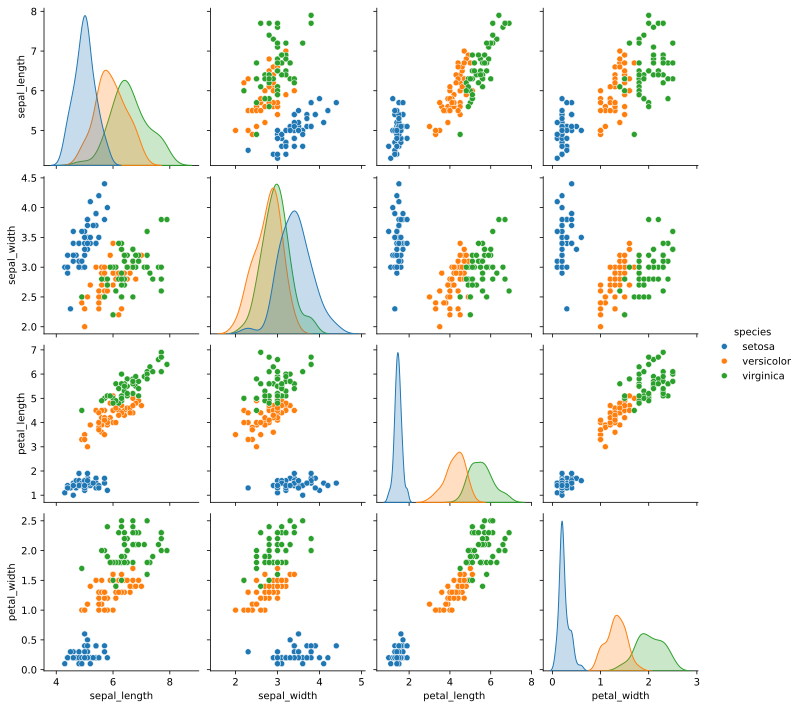

In [3]:
# some plots to show the data
sns.pairplot(iris, hue='species')
plt.show()

In [5]:
iris.species.value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


In [6]:
# organize the data

# convert from pandas dataframe to tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float()

# transform species to number
labels = torch.zeros(len(data), dtype=torch.long)

# labels[iris.species == 'setosa'] = 0 # don't need!
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2

print(data[0:5], labels[0:5])

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000]]) tensor([0, 0, 0, 0, 0])


In [7]:
## Create the ANN model

# model architecture
ANNiris = nn.Sequential(
    nn.Linear(4, 64), # input layer
    nn.ReLU(),        # activation
    nn.Linear(64, 64), # hidden layer
    nn.ReLU(),        # activation
    nn.Linear(64, 3)  # output layer
)


# loss function
loss_fn = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(ANNiris.parameters(), lr=0.01)

In [8]:
## Train the model
num_epochs = 1000

# initialise losses
losses = torch.zeros(num_epochs)
ongoingAcc = []

# loop over epochs
for epoch_i in range(num_epochs):
  # forward pass
  y_hat = ANNiris(data)

  # compute loss
  loss = loss_fn(y_hat, labels)
  losses[epoch_i] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # compute accuracy
  matches = torch.argmax(y_hat, axis=1) == labels  # booleans (false / true)
  matchesNumeric = matches.float()                 # convert to numbers (0/1)
  accuracyPct = 100*torch.mean(matchesNumeric)     # average
  ongoingAcc.append(accuracyPct)                   # add to list of accuracies

In [10]:
# final forward pass
predictions = ANNiris(data)

pred_labels = torch.argmax(predictions, axis=1)
total_acc = 100 * torch.mean((pred_labels == labels).float())
total_acc

tensor(98.)

In [11]:
torch.argmax(y_hat, axis=1)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

Final accuracy: 98.0%


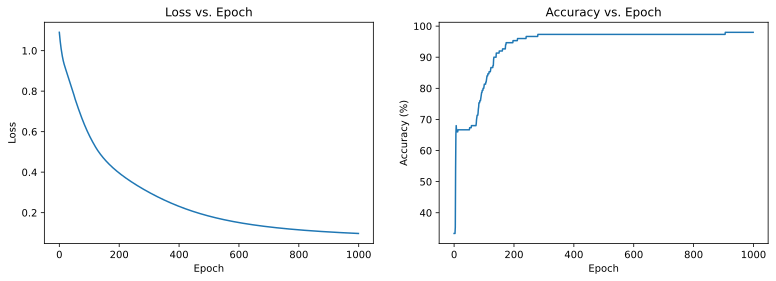

In [15]:
## Report accuracy
print(f"Final accuracy: {total_acc}%")

fig, ax = plt.subplots(1, 2, figsize=(13, 4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss vs. Epoch')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Epoch')
ax[1].set_title('Accuracy vs. Epoch')

plt.show()

In [16]:
# Confirm that all model predictions sum to 1, but only when converted to softmax
sm = nn.Softmax(dim=1)
torch.sum(sm(y_hat), axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

In [18]:
y_hat.detach()[0]

tensor([  7.8190,   2.5185, -10.6219])

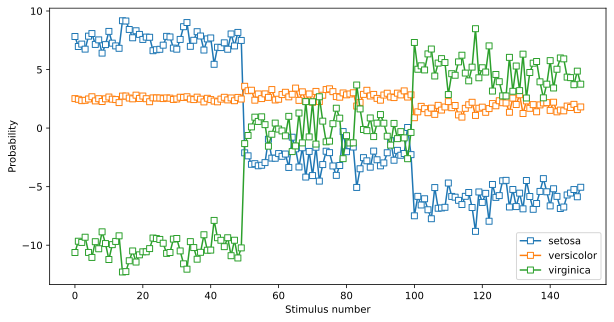

In [20]:
# plot the raw model outputs
fig = plt.figure(figsize=(10, 5))

plt.plot(y_hat.detach(), 's-', markerfacecolor='w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['setosa', 'versicolor', 'virginica'])
plt.show()

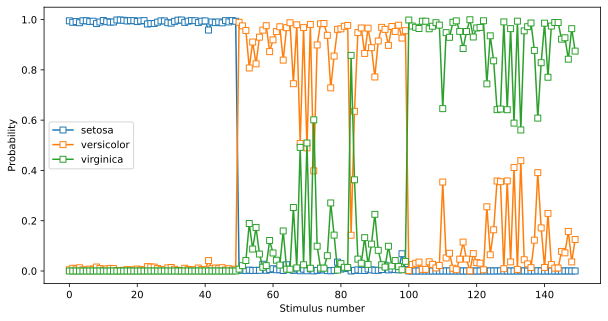

In [21]:
fig = plt.figure(figsize=(10, 5))

plt.plot(sm(y_hat.detach()), 's-', markerfacecolor='w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['setosa', 'versicolor', 'virginica'])
plt.show()

In [31]:
# 1) When the loss does not reach an asymptote, it's a good idea to train the model for more epochs. Increase the number of
#    epochs until the plot of the losses seems to hit a "floor" (that's a statistical term for being as small as possible).

## Create the ANN model

# model architecture
ANNiris = nn.Sequential(
    nn.Linear(4, 64), # input layer
    nn.ReLU(),        # activation
    nn.Linear(64, 64), # hidden layer
    nn.ReLU(),        # activation
    nn.Linear(64, 3)  # output layer
)


# loss function
loss_fn = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(ANNiris.parameters(), lr=0.01)


## Train the model
num_epochs = 5000

# initialise losses
losses = torch.zeros(num_epochs)
ongoingAcc = []

# loop over epochs
for epoch_i in range(num_epochs):
  # forward pass
  y_hat = ANNiris(data)

  # compute loss
  loss = loss_fn(y_hat, labels)
  losses[epoch_i] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # compute accuracy
  matches = torch.argmax(y_hat, axis=1) == labels  # booleans (false / true)
  matchesNumeric = matches.float()                 # convert to numbers (0/1)
  accuracyPct = 100*torch.mean(matchesNumeric)     # average
  ongoingAcc.append(accuracyPct)                   # add to list of accuracies

In [32]:
# final forward pass
predictions = ANNiris(data)

pred_labels = torch.argmax(predictions, axis=1)
total_acc = 100 * torch.mean((pred_labels == labels).float())
total_acc

tensor(98.6667)

Final accuracy: 98.66667175292969%


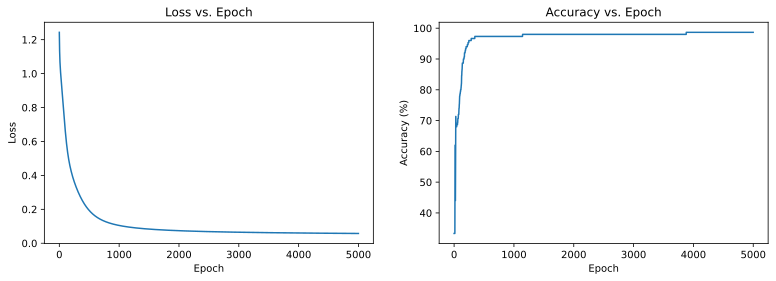

In [33]:
## Report accuracy
print(f"Final accuracy: {total_acc}%")

fig, ax = plt.subplots(1, 2, figsize=(13, 4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss vs. Epoch')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Epoch')
ax[1].set_title('Accuracy vs. Epoch')

plt.show()

In [34]:
# 2) We used a model with 64 hidden units. Modify the code to have 16 hidden units. How does this model perform? If there
#    is a decrease in accuracy, is that decrease distributed across all three iris types, or does the model learn some
#    iris types and not others?

## Create the ANN model

# model architecture
ANNiris = nn.Sequential(
    nn.Linear(4, 16), # input layer
    nn.ReLU(),        # activation
    nn.Linear(16, 16), # hidden layer
    nn.ReLU(),        # activation
    nn.Linear(16, 3)  # output layer
)


# loss function
loss_fn = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(ANNiris.parameters(), lr=0.01)


## Train the model
num_epochs = 1000

# initialise losses
losses = torch.zeros(num_epochs)
ongoingAcc = []

# loop over epochs
for epoch_i in range(num_epochs):
  # forward pass
  y_hat = ANNiris(data)

  # compute loss
  loss = loss_fn(y_hat, labels)
  losses[epoch_i] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # compute accuracy
  matches = torch.argmax(y_hat, axis=1) == labels  # booleans (false / true)
  matchesNumeric = matches.float()                 # convert to numbers (0/1)
  accuracyPct = 100*torch.mean(matchesNumeric)     # average
  ongoingAcc.append(accuracyPct)                   # add to list of accuracies

In [35]:
# final forward pass
predictions = ANNiris(data)

pred_labels = torch.argmax(predictions, axis=1)
total_acc = 100 * torch.mean((pred_labels == labels).float())
total_acc

tensor(98.)

Final accuracy: 98.0%


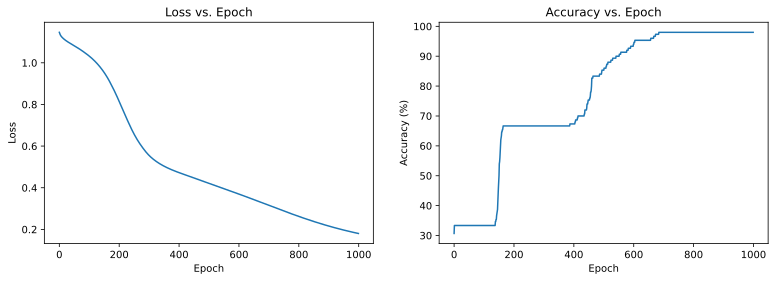

In [36]:
## Report accuracy
print(f"Final accuracy: {total_acc}%")

fig, ax = plt.subplots(1, 2, figsize=(13, 4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss vs. Epoch')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Epoch')
ax[1].set_title('Accuracy vs. Epoch')

plt.show()

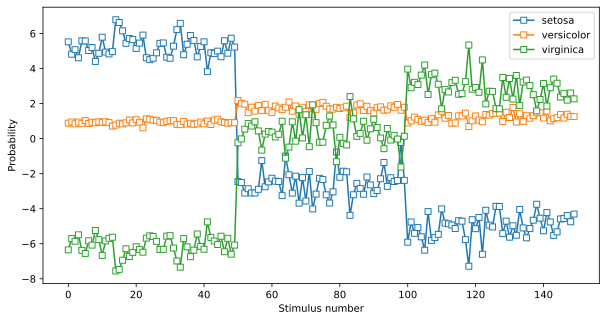

In [37]:
# plot the raw model outputs
fig = plt.figure(figsize=(10, 5))

plt.plot(y_hat.detach(), 's-', markerfacecolor='w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['setosa', 'versicolor', 'virginica'])
plt.show()

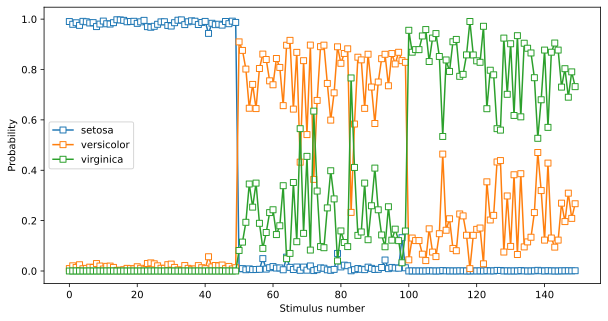

In [38]:
fig = plt.figure(figsize=(10, 5))

plt.plot(sm(y_hat.detach()), 's-', markerfacecolor='w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['setosa', 'versicolor', 'virginica'])
plt.show()

In [39]:
torch.argmax(y_hat, axis=1)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [41]:
d = torch.argmax(y_hat, axis=1).numpy()
d

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [45]:
#
zeros = d[d == 0].shape[0]
ones = d[d == 1].sum()
twos = d[d == 2].shape[0]
print(zeros, ones, twos)


50 47 53


In [46]:
# Write code to compute three accuracy scores, one for each iris type
# model architecture
ANNiris = nn.Sequential(
    nn.Linear(4, 16), # input layer
    nn.ReLU(),        # activation
    nn.Linear(16, 16), # hidden layer
    nn.ReLU(),        # activation
    nn.Linear(16, 3)  # output layer
)


# loss function
loss_fn = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(ANNiris.parameters(), lr=0.01)


## Train the model
num_epochs = 1000

# initialise losses
losses = torch.zeros(num_epochs)
ongoingAcc = []
ongoingAccZero = []
ongoingAccOne = []
ongoingAccTwo = []

# loop over epochs
for epoch_i in range(num_epochs):
  # forward pass
  y_hat = ANNiris(data)

  # compute loss
  loss = loss_fn(y_hat, labels)
  losses[epoch_i] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # compute accuracy
  matches = torch.argmax(y_hat, axis=1) == labels  # booleans (false / true)
  matchesNumeric = matches.float()                 # convert to numbers (0/1)
  accuracyPct = 100*torch.mean(matchesNumeric)     # average
  ongoingAcc.append(accuracyPct)                   # add to list of accuracies

  matches_zero = torch.argmax(y_hat, axis=1) == 0  # booleans (false / true)
  matches_one = torch.argmax(y_hat, axis=1) == 1  # booleans (false / true)
  matches_two = torch.argmax(y_hat, axis=1) == 2  # booleans (false / true)
  matchesNumeric_zero = matches_zero.float()
  matchesNumeric_one = matches_one.float()
  matchesNumeric_two = matches_two.float()
  accuracyPct_zero = 100*torch.mean(matchesNumeric_zero)
  accuracyPct_one = 100*torch.mean(matchesNumeric_one)
  accuracyPct_two = 100*torch.mean(matchesNumeric_two)
  ongoingAccZero.append(accuracyPct_zero)
  ongoingAccOne.append(accuracyPct_one)
  ongoingAccTwo.append(accuracyPct_two)

Final accuracy: 98.0%


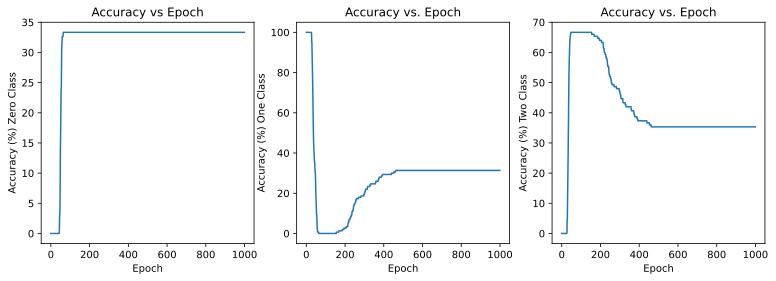

In [48]:
## Report accuracy
print(f"Final accuracy: {total_acc}%")

fig, ax = plt.subplots(1, 3, figsize=(13, 4))

ax[0].plot(ongoingAccZero)
ax[0].set_ylabel('Accuracy (%) Zero Class')
ax[0].set_xlabel('Epoch')
ax[0].set_title('Accuracy vs Epoch')

ax[1].plot(ongoingAccOne)
ax[1].set_ylabel('Accuracy (%) One Class')
ax[1].set_xlabel('Epoch')
ax[1].set_title('Accuracy vs. Epoch')

ax[2].plot(ongoingAccTwo)
ax[2].set_ylabel('Accuracy (%) Two Class')
ax[2].set_xlabel('Epoch')
ax[2].set_title('Accuracy vs. Epoch')

plt.show()

In [49]:
# final forward pass
predictions = ANNiris(data)

pred_labels = torch.argmax(predictions, axis=1)
total_acc = 100 * torch.mean((pred_labels == labels).float())
total_acc

tensor(98.)